# Is Palmer Penguins Okay?

I wasn't sure if I was allowed to implement the Perceptron algorithm on Palmer Penguins, because that was technically a dataset that was mentioned in class. As such, I've made this second notebook just in case that's an invalid dataset to use. I may just be overthinking it (but I will not be risking my GPA :')), so in the meantime, enjoy this implementation of the Perceptron on the mushrooms dataset using sci-kit learn modules. It's a lot briefer, but I hope you understand that I definitely understand this Perceptron model (please trust me).

[The Mushrooms Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) contains samples from 23 species of gilled mushrooms, in which mushrooms are classified to be edible or poisonous. The other key features are defined here:

1) cap_diameter
2) cap-shape
3) gill-attachment 
4) gill_color
5) stem_height
6) stem_width
7) stem-color
8) season
9) class


We will be trying to predict whether or not a mushroom is poisonous based on two features.

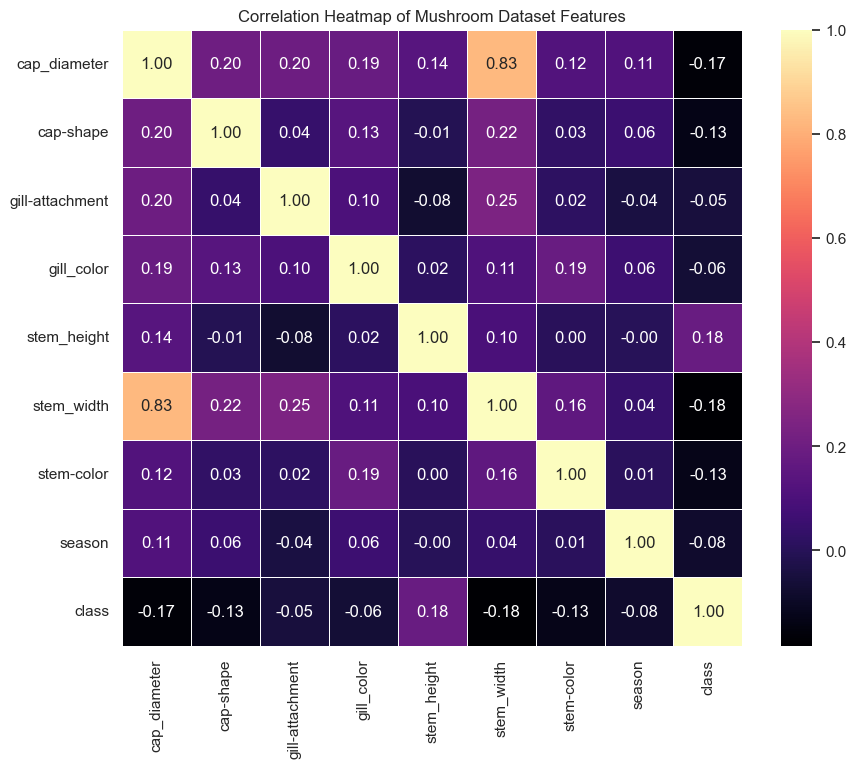

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

sns.set_theme()

url = r"C:\Users\faith\new577\INDE577\577repo\Supervised Learning\Datasets\mushroom_cleaned.csv"
df = pd.read_csv(url)
df= df.dropna()


#plotting a heatmap to see correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

Since it seems like stem width and cap diameter are pretty highly correlated, let's try to classify this dataset based on those features.

In [59]:
X = df.iloc[:, [0,5]]
y = df.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

In [60]:
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

print(f"Training accuracy: {train_accuracy:.2f}%")
print(f"Test accuracy: {test_accuracy:.2f}%")

Training accuracy: 55.00%
Test accuracy: 54.58%


Not the best accuracy, but note that the data might not be so easily separable! We can visualize that through this plot here:

c:\Users\faith\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


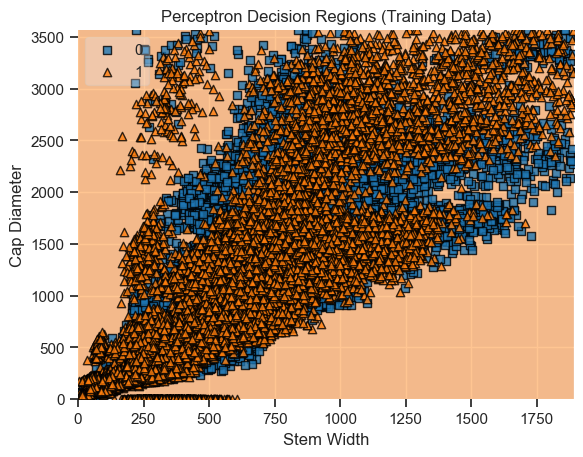

c:\Users\faith\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


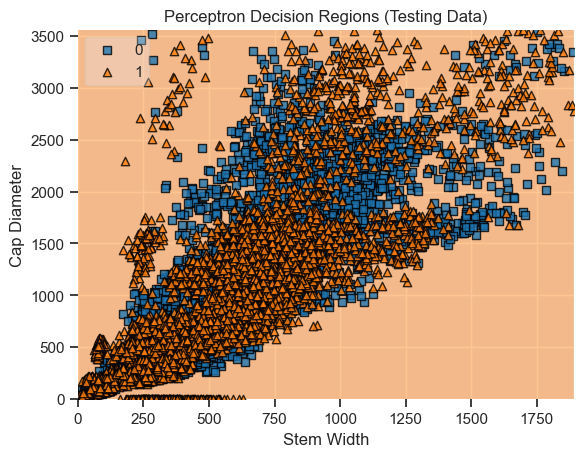

In [64]:
from mlxtend.plotting import plot_decision_regions

# Plot decision regions for training data
plot_decision_regions(X_train.values, y_train.values, clf=perceptron, legend=2)
plt.title('Perceptron Decision Regions (Training Data)')
plt.xlabel('Stem Width')
plt.ylabel('Cap Diameter')
plt.show()

# Plot decision regions for testing data
plot_decision_regions(X_test.values, y_test.values, clf=perceptron, legend=2)
plt.title('Perceptron Decision Regions (Testing Data)')
plt.xlabel('Stem Width')
plt.ylabel('Cap Diameter')
plt.show()


So yes, definitely really crazy. This is not linearly separable at all- in fact it feels like the data is literally just on top of each other! That is one of the big limitations of the Perceptron, and we'll learn more about stronger algorithms throughout this repository.